In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error


In [4]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\hospital_patient_flow_less_numeric_50000.csv")
df

,patient_id,age,admission_day,admission_month,department_code,bed_number,length_of_stay_days,severity_score,doctor_id,nurse_count,treatment_cost,bed_occupancy_rate
0,1.0,52.0,1.0,6.0,2.0,180.0,6,5,26,8,2931.63,33.04
1,2.0,15.0,30.0,3.0,9.0,175.0,1,1,85,2,3912.43,15.39
2,3.0,72.0,17.0,9.0,8.0,36.0,14,1,163,9,4865.19,16.29
3,4.0,61.0,15.0,1.0,3.0,137.0,5,4,163,5,2993.82,51.76
4,5.0,21.0,14.0,5.0,8.0,128.0,13,4,150,7,2593.48,53.04
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,87.0,19.0,3.0,8.0,63.0,3,3,50,8,4880.93,68.35
49996,49997.0,79.0,28.0,3.0,3.0,188.0,10,4,154,4,770.13,23.03
49997,49998.0,11.0,29.0,9.0,1.0,85.0,14,3,50,9,4785.32,73.74
49998,49999.0,23.0,7.0,8.0,5.0,40.0,14,5,186,1,4699.67,57.08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           49997 non-null  float64
 1   age                  49993 non-null  float64
 2   admission_day        49994 non-null  float64
 3   admission_month      49994 non-null  float64
 4   department_code      49994 non-null  float64
 5   bed_number           49994 non-null  float64
 6   length_of_stay_days  50000 non-null  int64  
 7   severity_score       50000 non-null  int64  
 8   doctor_id            50000 non-null  int64  
 9   nurse_count          50000 non-null  int64  
 10  treatment_cost       49998 non-null  float64
 11  bed_occupancy_rate   49998 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 4.6 MB


In [6]:
df.describe()

,patient_id,age,admission_day,admission_month,department_code,bed_number,length_of_stay_days,severity_score,doctor_id,nurse_count,treatment_cost,bed_occupancy_rate
count,49997.000000,49993.000000,49994.000000,49994.000000,49994.000000,49994.000000,50000.000000,50000.000000,50000.00000,50000.000000,49998.000000,49998.000000
mean,25000.001320,44.938491,15.518982,6.509301,4.987919,99.985078,7.476100,2.990480,104.49414,4.996280,2739.942183,42.518975
std,14433.044516,25.724091,8.672113,3.463149,2.585411,57.312774,4.028478,1.414705,55.00608,2.573161,1299.016626,21.664701
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.00000,1.000000,500.050000,5.000000
25%,12501.000000,23.000000,8.000000,3.250000,3.000000,50.000000,4.000000,2.000000,57.00000,3.000000,1615.382500,23.640000
50%,25000.000000,45.000000,16.000000,7.000000,5.000000,100.000000,7.000000,3.000000,104.00000,5.000000,2743.135000,42.530000
75%,37499.000000,67.000000,23.000000,10.000000,7.000000,150.000000,11.000000,4.000000,152.00000,7.000000,3864.317500,61.337500
max,50000.000000,89.000000,30.000000,12.000000,9.000000,199.000000,14.000000,5.000000,199.00000,9.000000,4999.980000,80.000000


In [7]:
df.shape

(50000, 12)

In [8]:
df.sample

<bound method NDFrame.sample of        patient_id   age  admission_day  admission_month  department_code  \
0             1.0  52.0            1.0              6.0              2.0   
1             2.0  15.0           30.0              3.0              9.0   
2             3.0  72.0           17.0              9.0              8.0   
3             4.0  61.0           15.0              1.0              3.0   
4             5.0  21.0           14.0              5.0              8.0   
...           ...   ...            ...              ...              ...   
49995     49996.0  87.0           19.0              3.0              8.0   
49996     49997.0  79.0           28.0              3.0              3.0   
49997     49998.0  11.0           29.0              9.0              1.0   
49998     49999.0  23.0            7.0              8.0              5.0   
49999     50000.0  26.0            9.0              9.0              9.0   

       bed_number  length_of_stay_days  severity_score 

In [9]:
df.head()

,patient_id,age,admission_day,admission_month,department_code,bed_number,length_of_stay_days,severity_score,doctor_id,nurse_count,treatment_cost,bed_occupancy_rate
0,1.0,52.0,1.0,6.0,2.0,180.0,6,5,26,8,2931.63,33.04
1,2.0,15.0,30.0,3.0,9.0,175.0,1,1,85,2,3912.43,15.39
2,3.0,72.0,17.0,9.0,8.0,36.0,14,1,163,9,4865.19,16.29
3,4.0,61.0,15.0,1.0,3.0,137.0,5,4,163,5,2993.82,51.76
4,5.0,21.0,14.0,5.0,8.0,128.0,13,4,150,7,2593.48,53.04


In [10]:
df.tail()

,patient_id,age,admission_day,admission_month,department_code,bed_number,length_of_stay_days,severity_score,doctor_id,nurse_count,treatment_cost,bed_occupancy_rate
49995,49996.0,87.0,19.0,3.0,8.0,63.0,3,3,50,8,4880.93,68.35
49996,49997.0,79.0,28.0,3.0,3.0,188.0,10,4,154,4,770.13,23.03
49997,49998.0,11.0,29.0,9.0,1.0,85.0,14,3,50,9,4785.32,73.74
49998,49999.0,23.0,7.0,8.0,5.0,40.0,14,5,186,1,4699.67,57.08
49999,50000.0,26.0,9.0,9.0,9.0,126.0,7,4,84,1,3498.71,17.17


In [11]:
df.count()

patient_id             49997
age                    49993
admission_day          49994
admission_month        49994
department_code        49994
bed_number             49994
length_of_stay_days    50000
severity_score         50000
doctor_id              50000
nurse_count            50000
treatment_cost         49998
bed_occupancy_rate     49998
dtype: int64

In [12]:
df.columns

Index(['patient_id', 'age', 'admission_day', 'admission_month',
       'department_code', 'bed_number', 'length_of_stay_days',
       'severity_score', 'doctor_id', 'nurse_count', 'treatment_cost',
       'bed_occupancy_rate'],
      dtype='object')

In [13]:
df.isnull().sum()

patient_id             3
age                    7
admission_day          6
admission_month        6
department_code        6
bed_number             6
length_of_stay_days    0
severity_score         0
doctor_id              0
nurse_count            0
treatment_cost         2
bed_occupancy_rate     2
dtype: int64

In [14]:
df.isnull().any()

patient_id              True
age                     True
admission_day           True
admission_month         True
department_code         True
bed_number              True
length_of_stay_days    False
severity_score         False
doctor_id              False
nurse_count            False
treatment_cost          True
bed_occupancy_rate      True
dtype: bool

In [15]:
df=df.drop_duplicates()

In [16]:
df['age'] = df['age'].fillna(df['age'].median())
df['severity_score'] = df['severity_score'].fillna(df['severity_score'].median())
df['treatment_cost'] = df['treatment_cost'].fillna(df['treatment_cost'].median())
df['bed_occupancy_rate'] = df['bed_occupancy_rate'].fillna(df['bed_occupancy_rate'].median())
df['admission_month'] = df['admission_month'].fillna(df['admission_month'].mode()[0])
df['admission_day'] = df['admission_day'].fillna(df['admission_day'].mode()[0])
df['department_code'] = df['department_code'].fillna(df['department_code'].mode()[0])
df['bed_number'] = df['bed_number'].fillna(df['bed_number'].mode()[0])


In [17]:
df.isnull().sum()

patient_id             3
age                    0
admission_day          0
admission_month        0
department_code        0
bed_number             0
length_of_stay_days    0
severity_score         0
doctor_id              0
nurse_count            0
treatment_cost         0
bed_occupancy_rate     0
dtype: int64

In [18]:
df.drop(['bed_number'],axis=1,inplace=True)
df.drop(['patient_id'],axis=1,inplace=True)

In [19]:
df

,age,admission_day,admission_month,department_code,length_of_stay_days,severity_score,doctor_id,nurse_count,treatment_cost,bed_occupancy_rate
0,52.0,1.0,6.0,2.0,6,5,26,8,2931.63,33.04
1,15.0,30.0,3.0,9.0,1,1,85,2,3912.43,15.39
2,72.0,17.0,9.0,8.0,14,1,163,9,4865.19,16.29
3,61.0,15.0,1.0,3.0,5,4,163,5,2993.82,51.76
4,21.0,14.0,5.0,8.0,13,4,150,7,2593.48,53.04
...,...,...,...,...,...,...,...,...,...,...
49995,87.0,19.0,3.0,8.0,3,3,50,8,4880.93,68.35
49996,79.0,28.0,3.0,3.0,10,4,154,4,770.13,23.03
49997,11.0,29.0,9.0,1.0,14,3,50,9,4785.32,73.74
49998,23.0,7.0,8.0,5.0,14,5,186,1,4699.67,57.08


<Axes: ylabel='length_of_stay_days'>

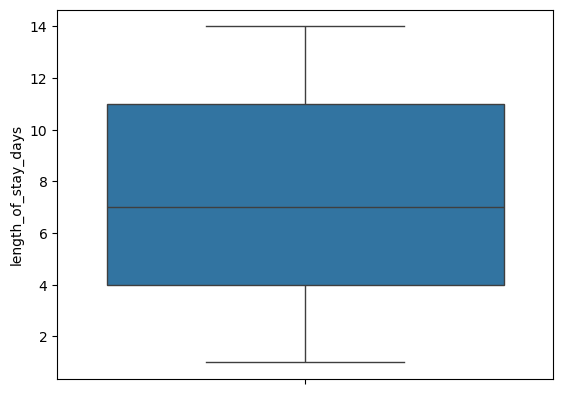

In [53]:
sns.boxplot(df['length_of_stay_days'])

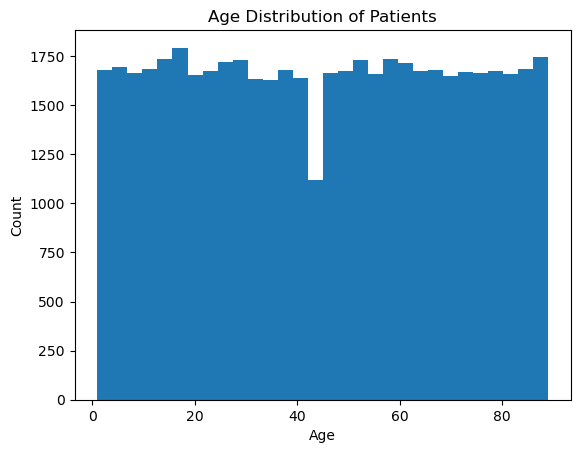

In [20]:
plt.hist(df['age'], bins=30)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

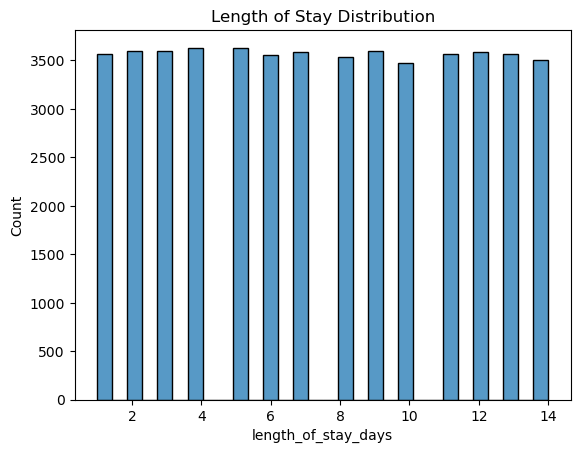

In [21]:
sns.histplot(df['length_of_stay_days'], bins=30)
plt.title("Length of Stay Distribution")
plt.show()

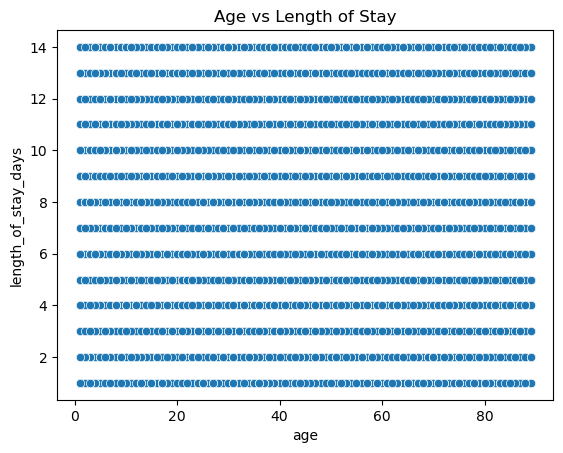

In [22]:
sns.scatterplot(x='age', y='length_of_stay_days', data=df)
plt.title("Age vs Length of Stay")
plt.show()

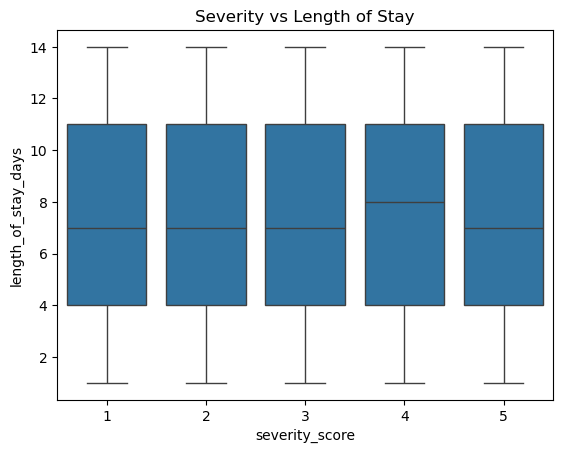

In [23]:
sns.boxplot(x='severity_score', y='length_of_stay_days', data=df)
plt.title("Severity vs Length of Stay")
plt.show()

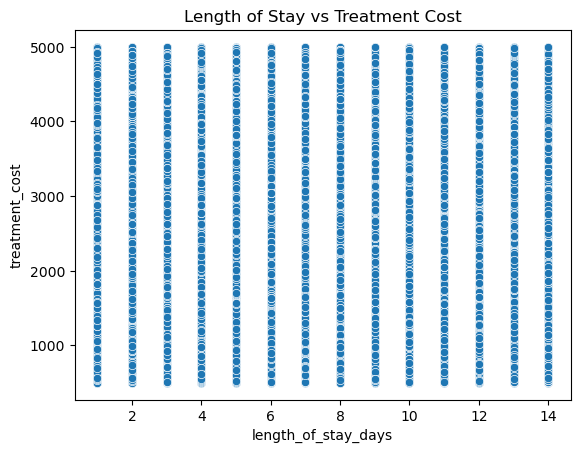

In [24]:
sns.scatterplot(x='length_of_stay_days', y='treatment_cost', data=df)
plt.title("Length of Stay vs Treatment Cost")
plt.show()

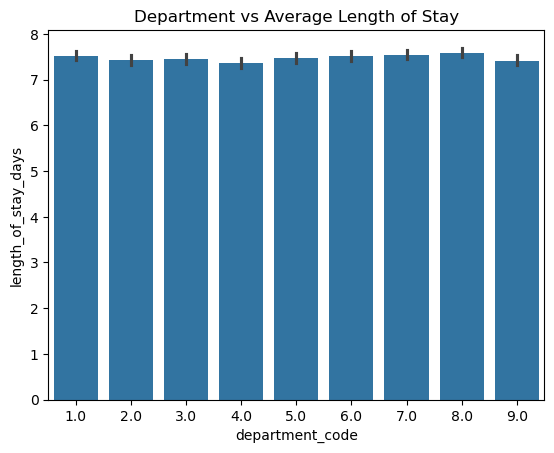

In [25]:
sns.barplot(x='department_code', y='length_of_stay_days', data=df)
plt.title("Department vs Average Length of Stay")
plt.show()

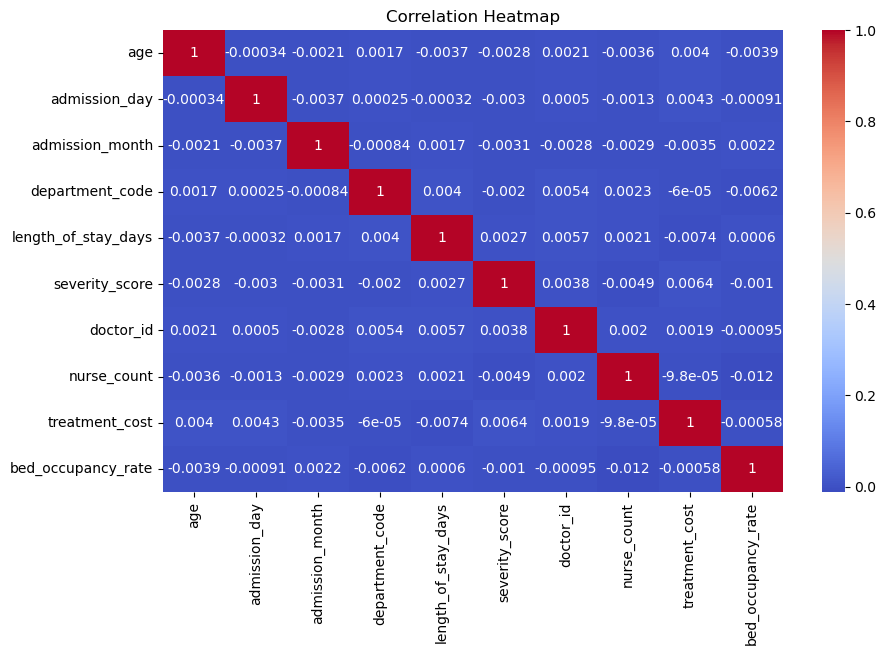

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [27]:
df.isnull().sum()

age                    0
admission_day          0
admission_month        0
department_code        0
length_of_stay_days    0
severity_score         0
doctor_id              0
nurse_count            0
treatment_cost         0
bed_occupancy_rate     0
dtype: int64

In [28]:
x=df[['age','admission_day','admission_month','department_code','length_of_stay_days','severity_score',  'bed_occupancy_rate']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler

In [30]:
x

,age,admission_day,admission_month,department_code,length_of_stay_days,severity_score,bed_occupancy_rate
0,52.0,1.0,6.0,2.0,6,5,33.04
1,15.0,30.0,3.0,9.0,1,1,15.39
2,72.0,17.0,9.0,8.0,14,1,16.29
3,61.0,15.0,1.0,3.0,5,4,51.76
4,21.0,14.0,5.0,8.0,13,4,53.04
...,...,...,...,...,...,...,...
49995,87.0,19.0,3.0,8.0,3,3,68.35
49996,79.0,28.0,3.0,3.0,10,4,23.03
49997,11.0,29.0,9.0,1.0,14,3,73.74
49998,23.0,7.0,8.0,5.0,14,5,57.08


In [31]:
x=pd.get_dummies(x,drop_first=True)
x

,age,admission_day,admission_month,department_code,length_of_stay_days,severity_score,bed_occupancy_rate
0,52.0,1.0,6.0,2.0,6,5,33.04
1,15.0,30.0,3.0,9.0,1,1,15.39
2,72.0,17.0,9.0,8.0,14,1,16.29
3,61.0,15.0,1.0,3.0,5,4,51.76
4,21.0,14.0,5.0,8.0,13,4,53.04
...,...,...,...,...,...,...,...
49995,87.0,19.0,3.0,8.0,3,3,68.35
49996,79.0,28.0,3.0,3.0,10,4,23.03
49997,11.0,29.0,9.0,1.0,14,3,73.74
49998,23.0,7.0,8.0,5.0,14,5,57.08


In [32]:
x1=pd.get_dummies(x)
x1

,age,admission_day,admission_month,department_code,length_of_stay_days,severity_score,bed_occupancy_rate
0,52.0,1.0,6.0,2.0,6,5,33.04
1,15.0,30.0,3.0,9.0,1,1,15.39
2,72.0,17.0,9.0,8.0,14,1,16.29
3,61.0,15.0,1.0,3.0,5,4,51.76
4,21.0,14.0,5.0,8.0,13,4,53.04
...,...,...,...,...,...,...,...
49995,87.0,19.0,3.0,8.0,3,3,68.35
49996,79.0,28.0,3.0,3.0,10,4,23.03
49997,11.0,29.0,9.0,1.0,14,3,73.74
49998,23.0,7.0,8.0,5.0,14,5,57.08


In [33]:
X = df.drop('length_of_stay_days', axis=1)

# Target (output)
y = df['length_of_stay_days']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
LR= LinearRegression()

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = LR.predict(x_test)

In [39]:
r2=r2_score(y_test, y_pred)
r2*100


100.0

In [40]:
mae=mean_absolute_error(y_test,y_pred)
mae

3.225253397687311e-15

In [41]:
mse=mean_squared_error(y_test,y_pred)
mse

1.6025173110668338e-29

In [42]:
rmse=root_mean_squared_error(y_test,y_pred)
rmse

4.003145402139215e-15

In [43]:
rmse1=np.sqrt(mse)
rmse

4.003145402139215e-15

In [44]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [45]:
l1=Lasso()

In [46]:
l1.fit(x_train,y_train)
y_pred_l1=l1.predict(x_test)

In [47]:
r2_l1=r2_score(y_test,y_pred_l1)
r2_l1

0.996191157398064

In [48]:
mae_l1=mean_absolute_error(y_test,y_pred_l1)
mae_l1

0.21620955091805985

In [49]:
mse_l1=mean_squared_error(y_test,y_pred_l1)
mse_l1

0.062180268227646926

In [50]:
rmse_l1=root_mean_squared_error(y_test,y_pred_l1)
rmse_l1

0.24935971652944852

In [51]:
l2=Ridge()
l2.fit(x_train,y_train)
y_pred_l2=l2.predict(x_test)
r2_l2=r2_score(y_test,y_pred_l2)
r2_l2

0.9999999999976195

In [52]:
l12=ElasticNet()
l12.fit(x_train,y_train)
y_pred_l12=l12.predict(x_test)
r2_l12=r2_score(y_test,y_pred_l12)
r2_l12

0.996415766479939

In [ ]:
1